In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')
import omama as O
from pyod.models.knn import KNN
import pickle
import sklearn

In [3]:
with open('/raid/mpsych/datasetA.pkl','rb') as f:
    datasetA_X = pickle.load(f)
    
with open('/raid/mpsych/datasetA_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [4]:
X_feat_vect = O.Features.get_features(datasetA_X, 'hist', 'gaussian')

#  Showing why histogram has only 2 bins 

In [17]:
import  mahotas as mh

In [35]:
# using the gaussian fiter normalization that is used with the 7th index 
# which has histogram of: [7330312     116]

gaussian_img = mh.gaussian_filter(datasetA_X[7].pixels, sigma=1)
gaussian_img /= gaussian_img.max()

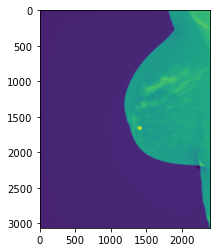

In [37]:
# just verifying the image is still an image
plt.imshow(gaussian_img)

In [38]:
# flattening for allowing easy counting with np.where
flat_img = gaussian_img.flatten()

In [49]:
# using npwhere to get the count of where pixels are a value of 1, or Bin 2
len(np.where(flat_img == 1)[0])

116

In [50]:
len(np.where(flat_img < 1)[0]) # values of bin 1

7330312

In [ ]:
# as we see there are 116 

# done showing why histogram is only two bins

In [9]:
np.where(labels > 0)

(array([27, 38, 47, 48, 61, 63, 81, 90]),)

In [14]:
for i, vec in enumerate(X_feat_vect):
    print('idx: ',i, ' true label: ', labels[i], X_feat_vect[i], 'pyod_label: ',pred_labels[i])

idx:  0  true label:  0 [4390715       1] pyod_label:  0
idx:  1  true label:  0 [7330427       1] pyod_label:  0
idx:  2  true label:  0 [4390715       1] pyod_label:  0
idx:  3  true label:  0 [4390715       1] pyod_label:  0
idx:  4  true label:  0 [7330427       1] pyod_label:  0
idx:  5  true label:  0 [4390715       1] pyod_label:  0
idx:  6  true label:  0 [4390715       1] pyod_label:  0
idx:  7  true label:  0 [7330312     116] pyod_label:  0
idx:  8  true label:  0 [4390715       1] pyod_label:  0
idx:  9  true label:  0 [4390715       1] pyod_label:  0
idx:  10  true label:  0 [7330427       1] pyod_label:  0
idx:  11  true label:  0 [13631022      466] pyod_label:  0
idx:  12  true label:  0 [7330427       1] pyod_label:  0
idx:  13  true label:  0 [7330427       1] pyod_label:  0
idx:  14  true label:  0 [7330427       1] pyod_label:  0
idx:  15  true label:  0 [7330427       1] pyod_label:  0
idx:  16  true label:  0 [4390715       1] pyod_label:  0
idx:  17  true label: 

0


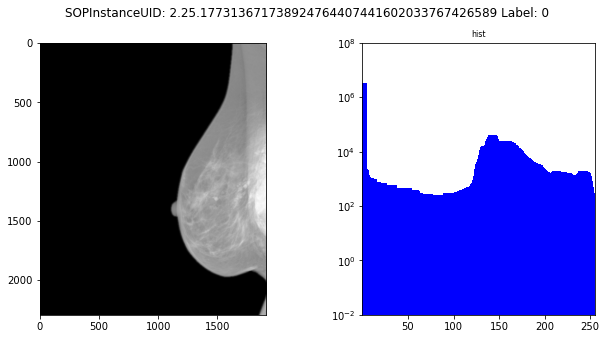

1


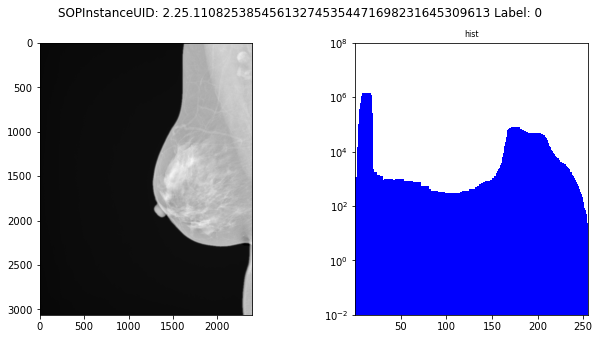

2


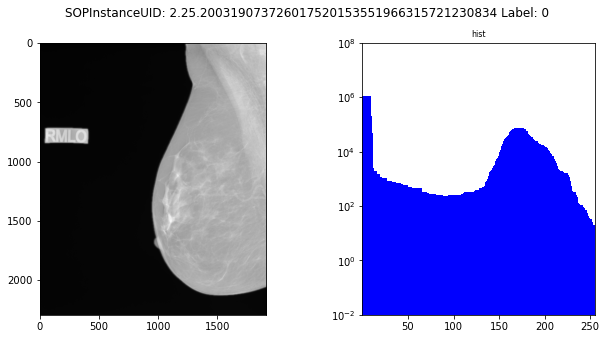

3


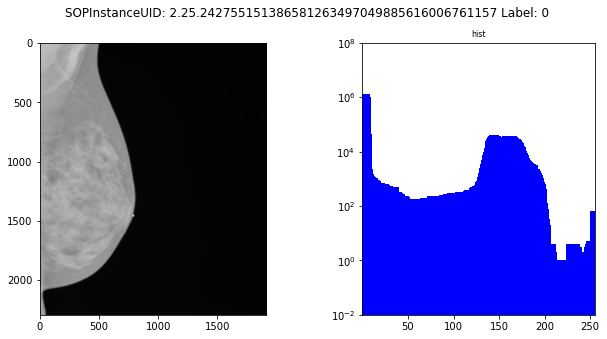

4


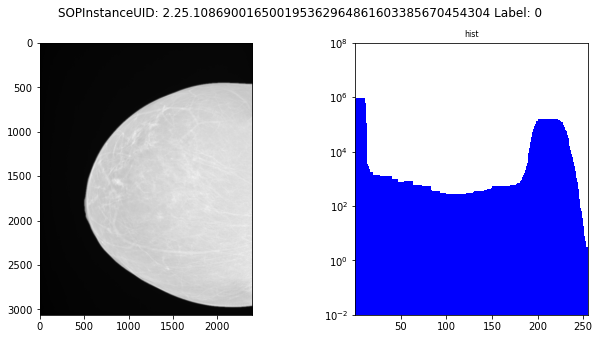

5


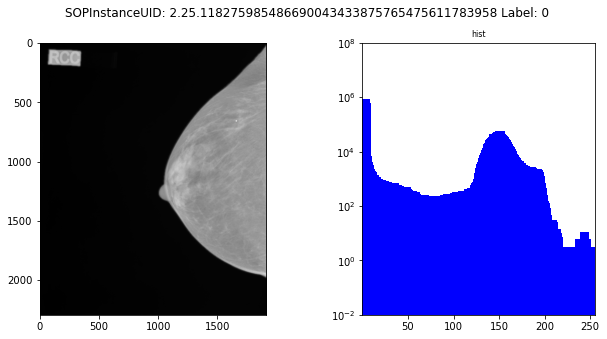

6


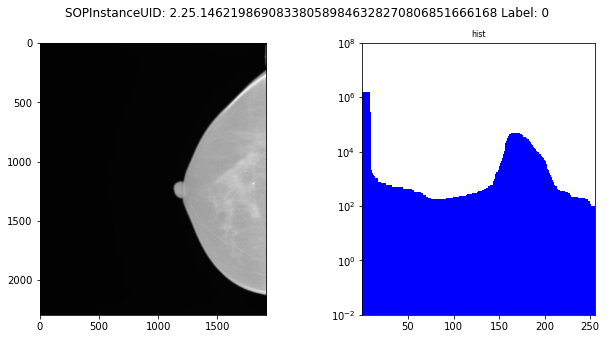

7


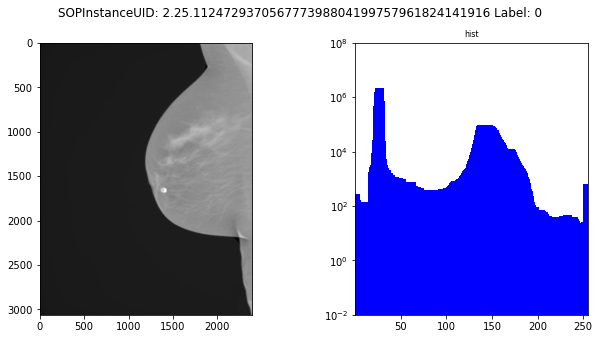

8


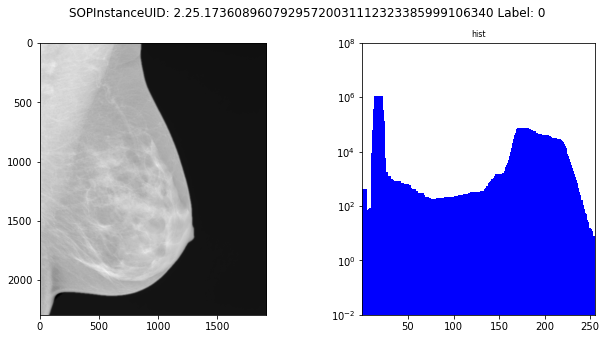

9


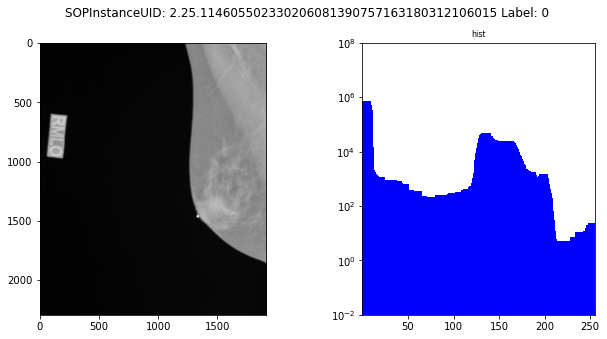

10


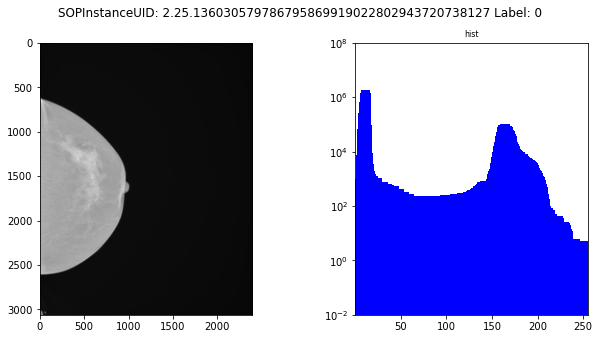

11


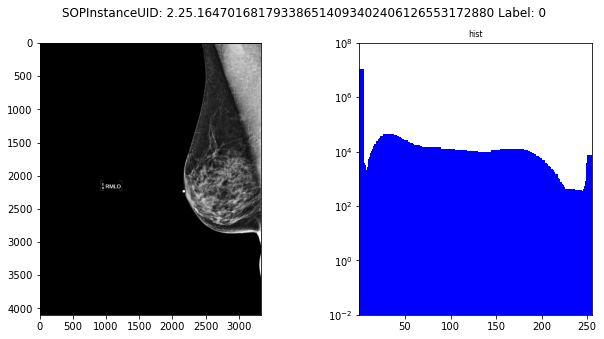

12


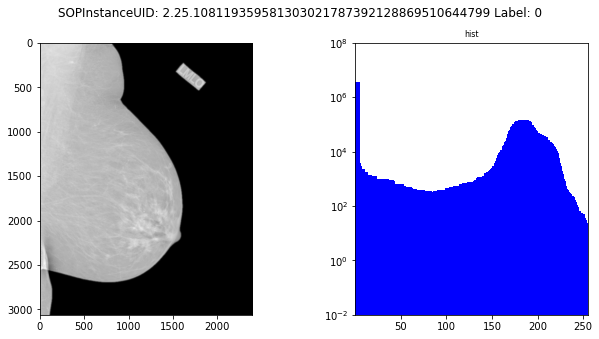

13


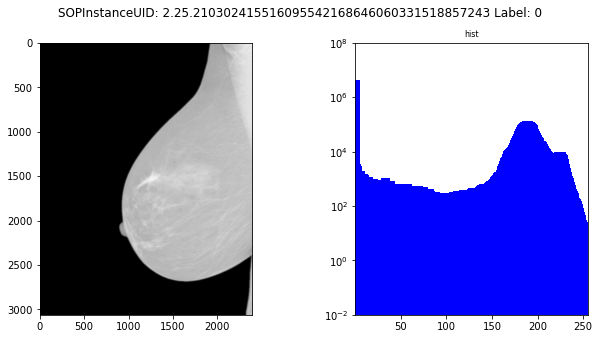

14


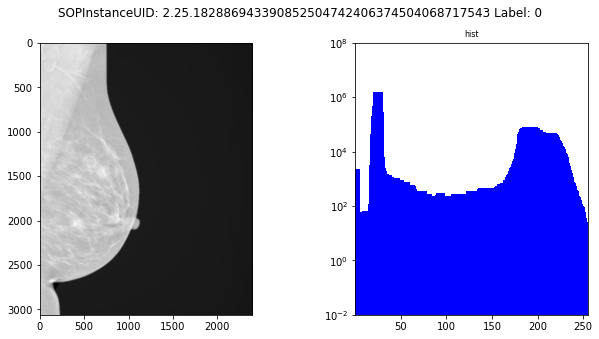

15


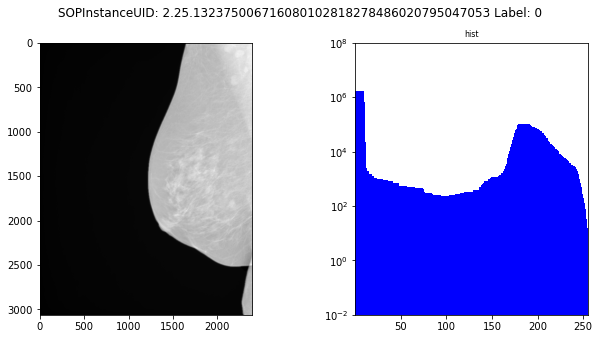

16


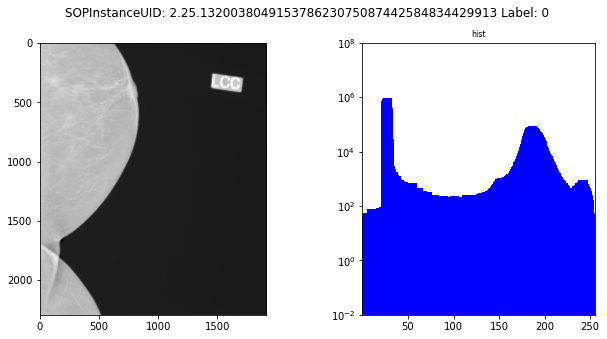

17


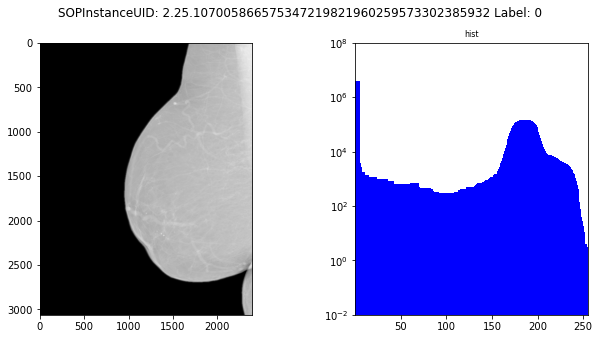

18


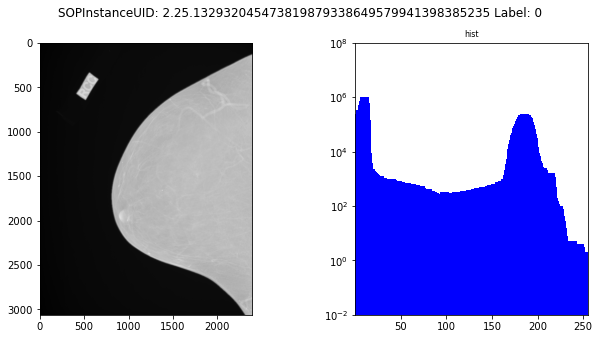

19


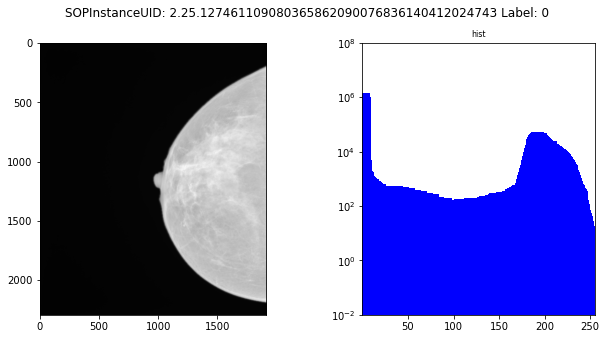

20


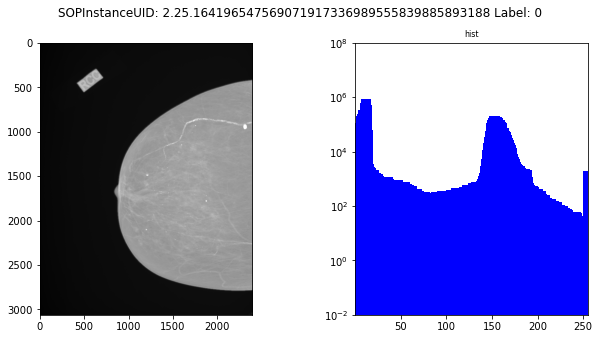

21


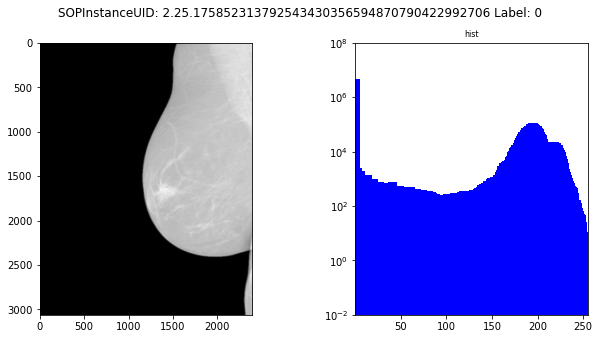

22


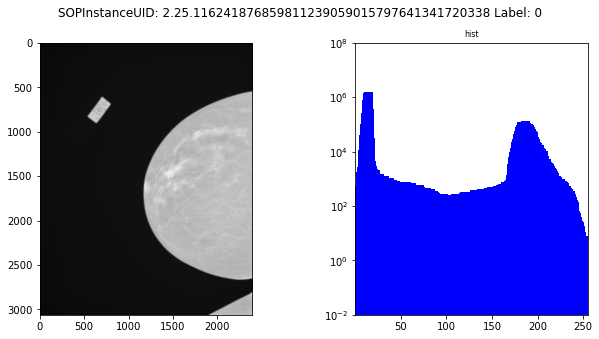

23


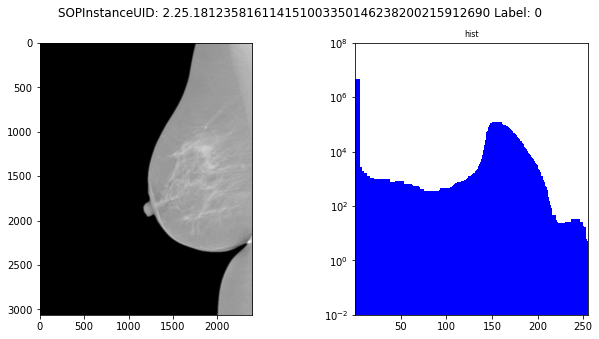

24


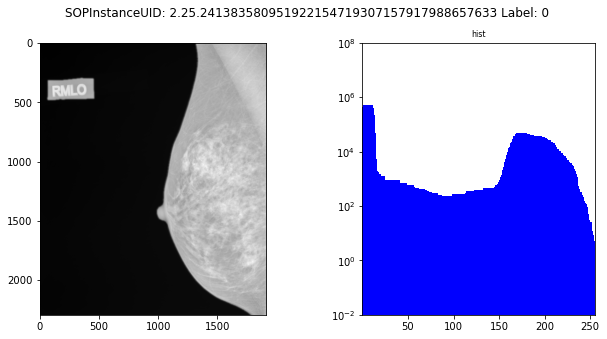

25


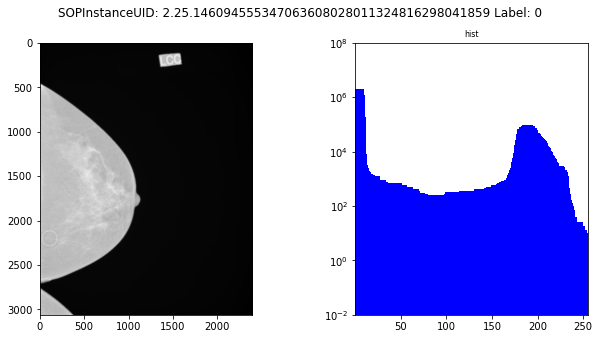

26


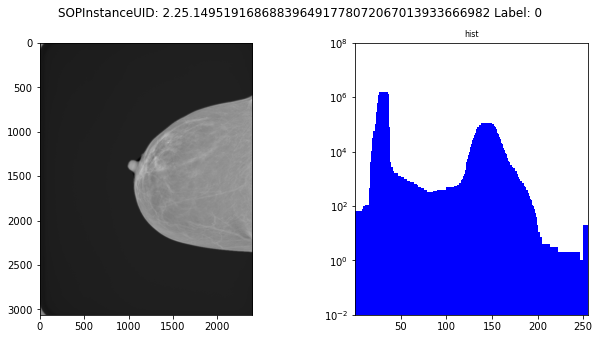

27


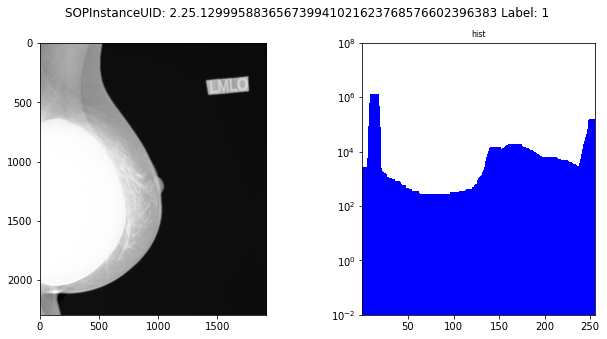

28


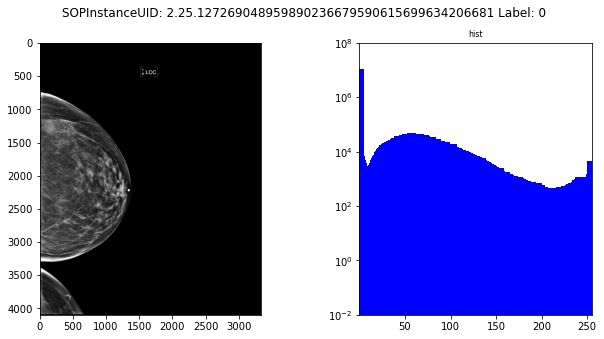

29


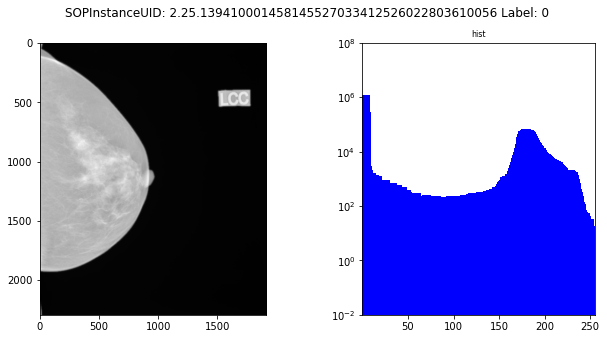

30


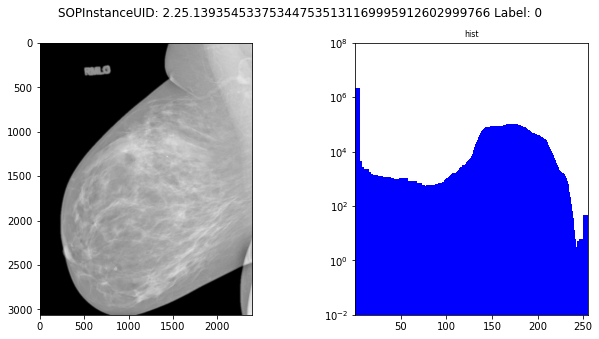

31


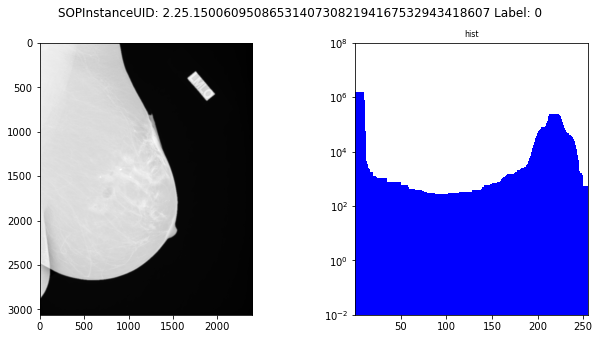

32


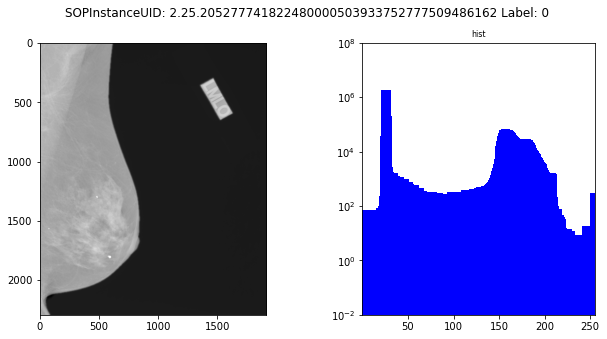

33


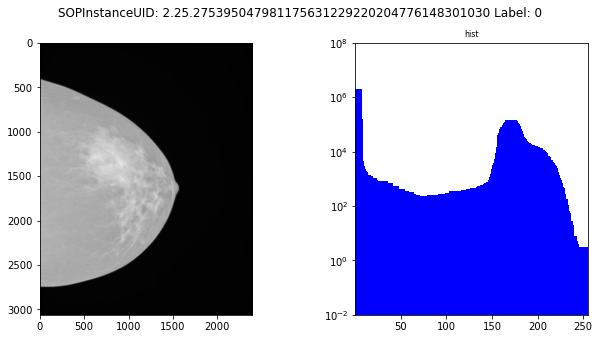

34


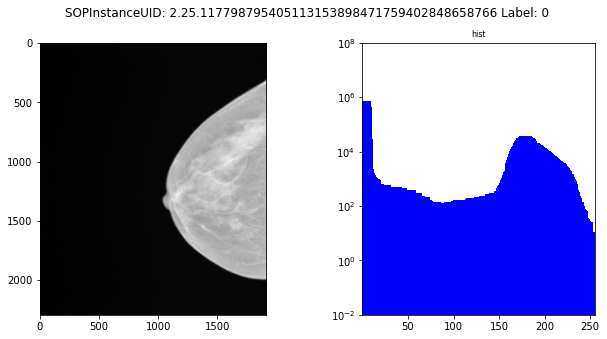

35


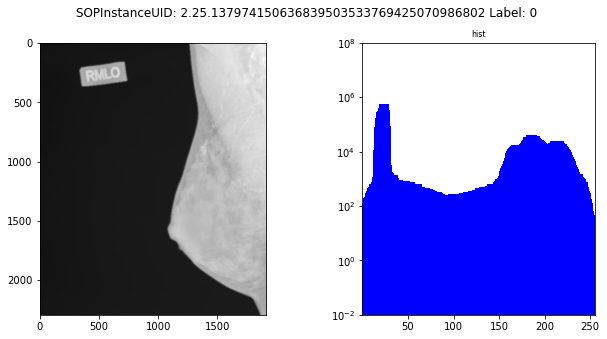

36


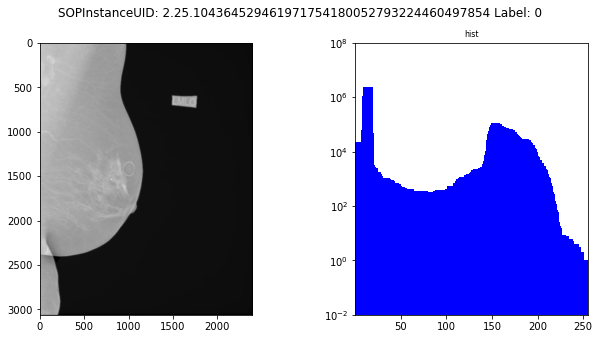

37


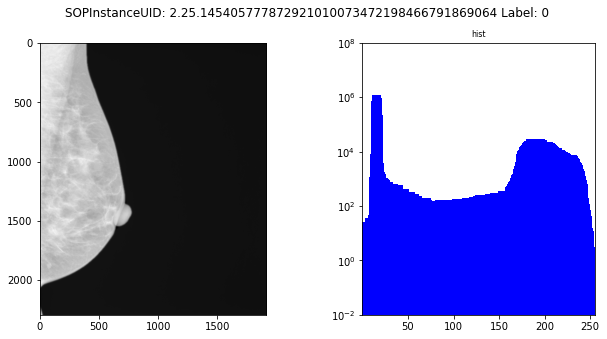

38


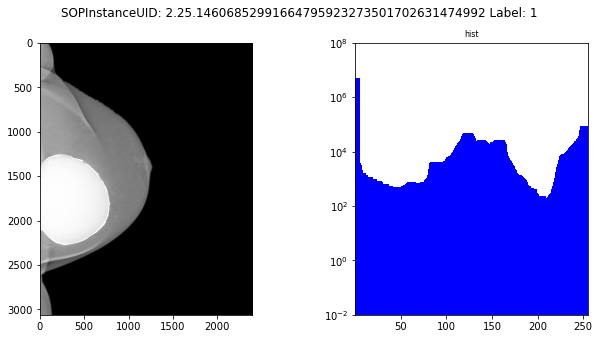

39


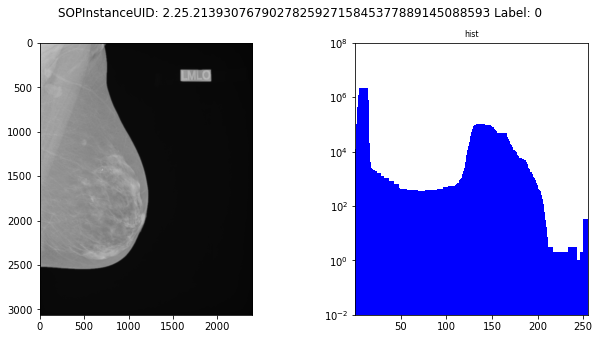

40


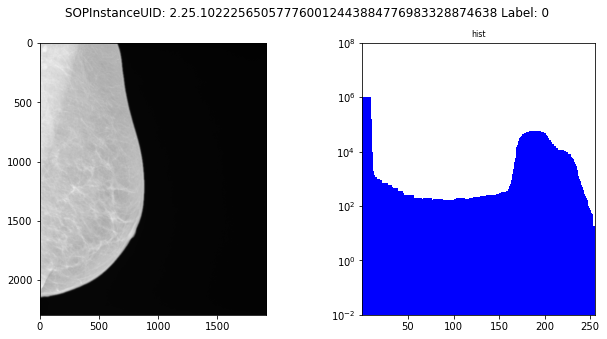

41


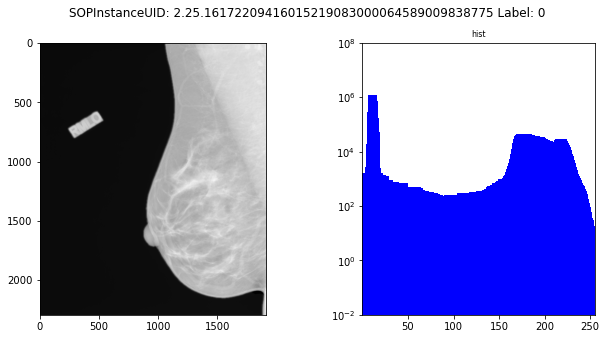

42


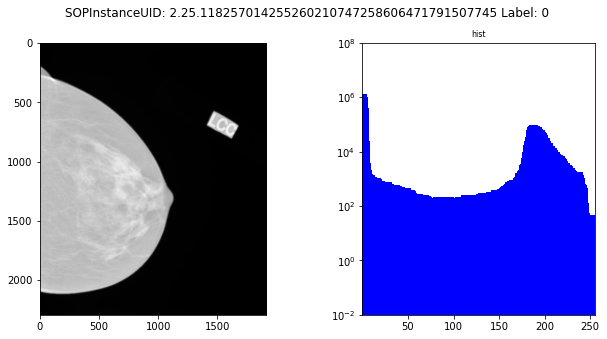

43


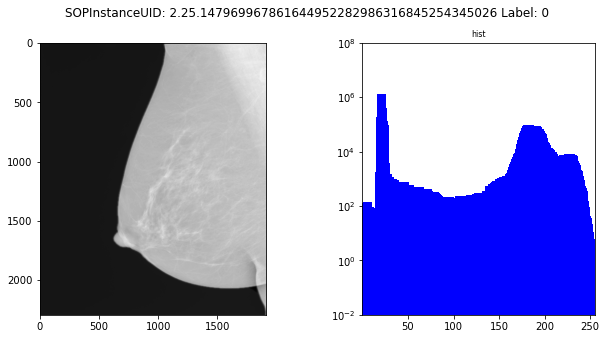

44


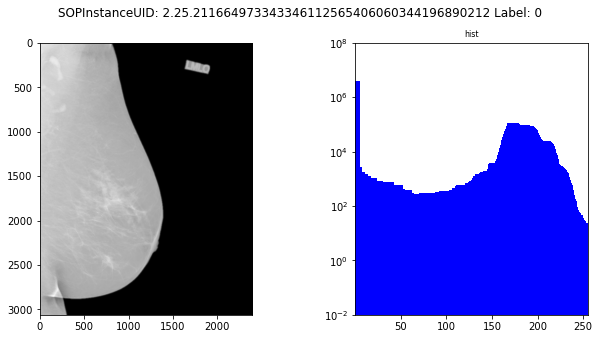

45


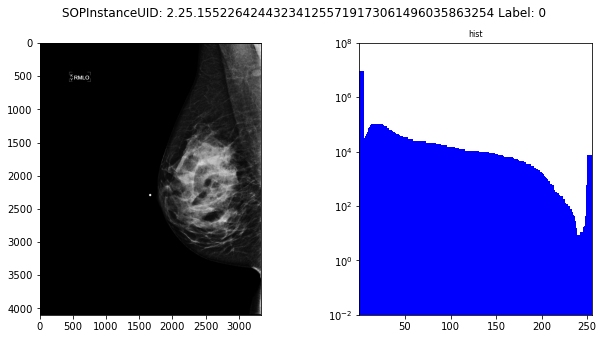

46


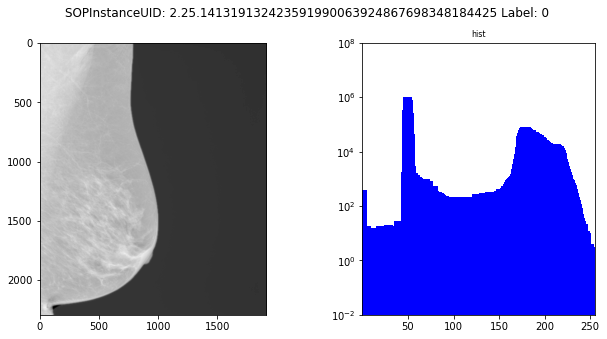

47


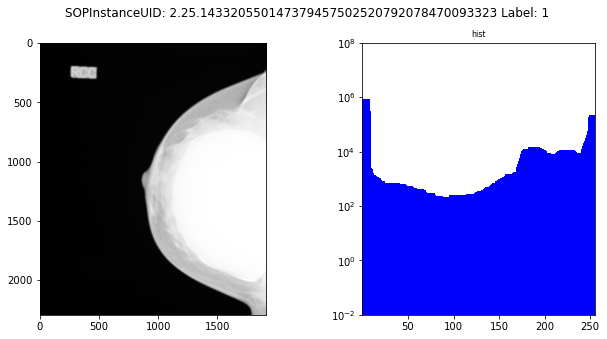

48


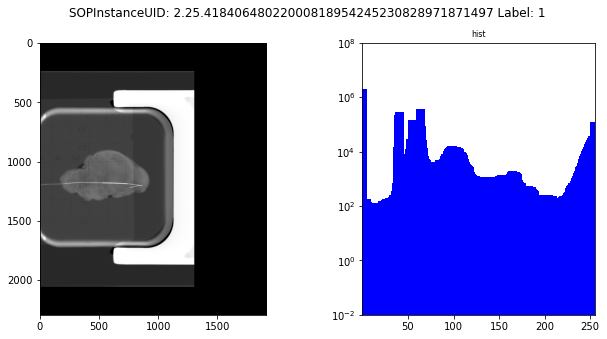

49


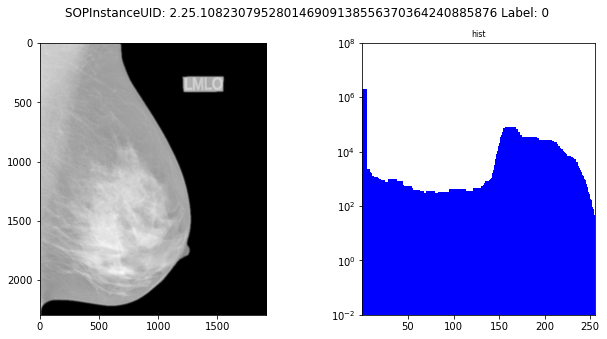

50


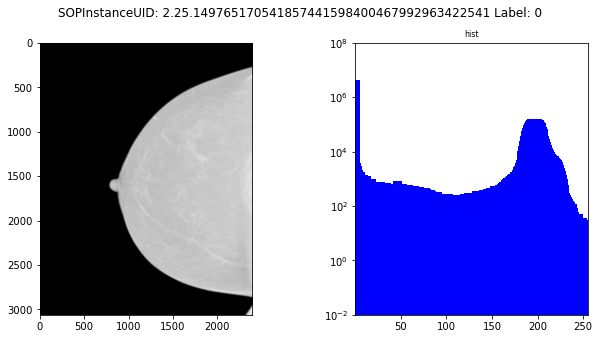

51


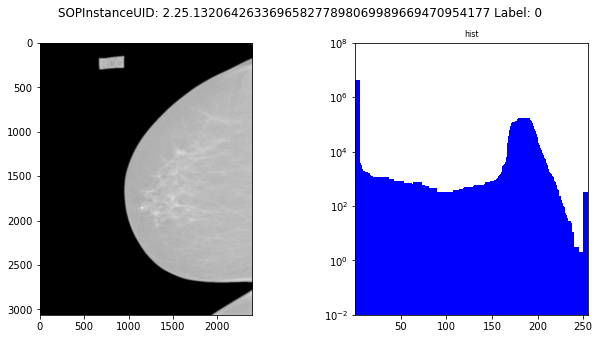

52


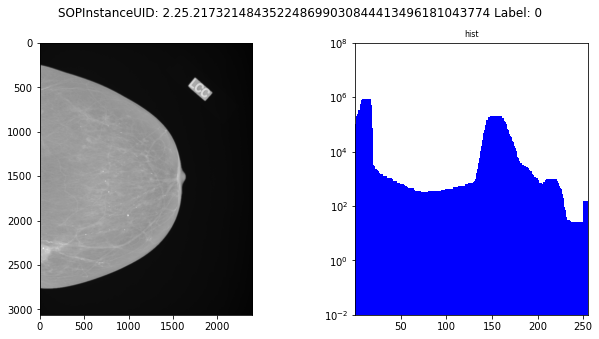

53


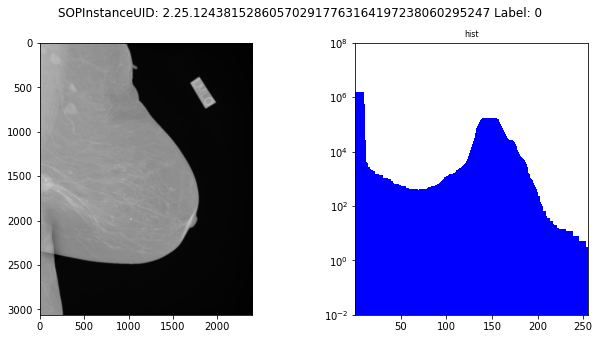

54


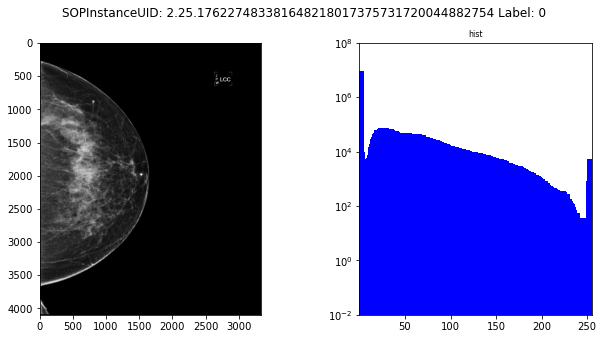

55


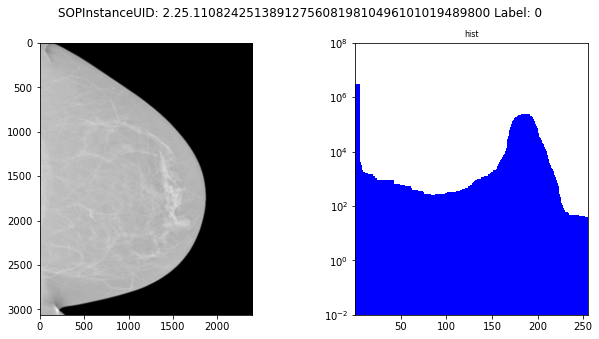

56


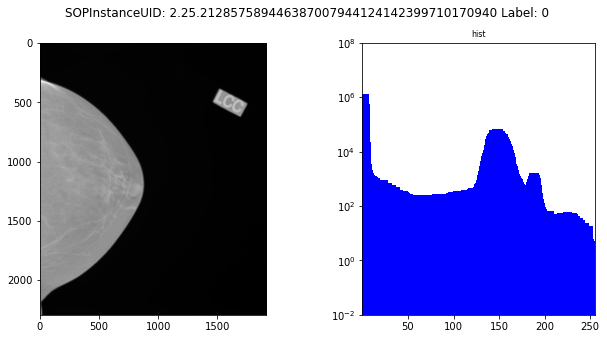

57


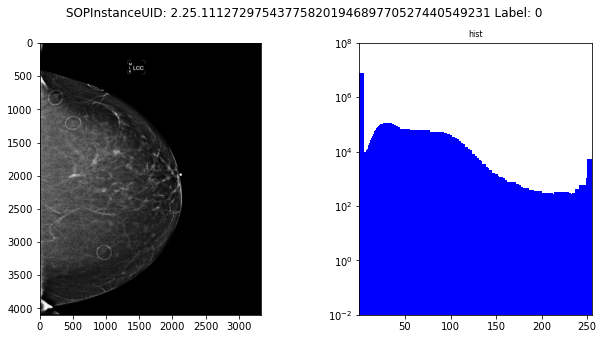

58


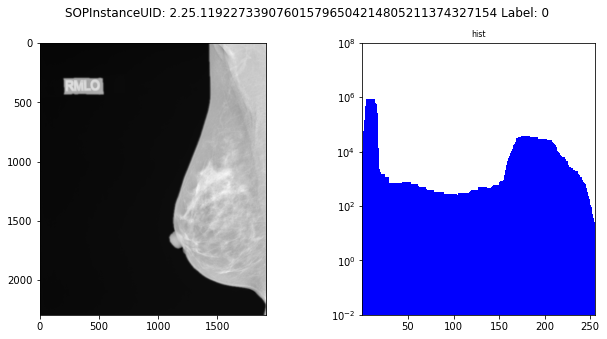

59


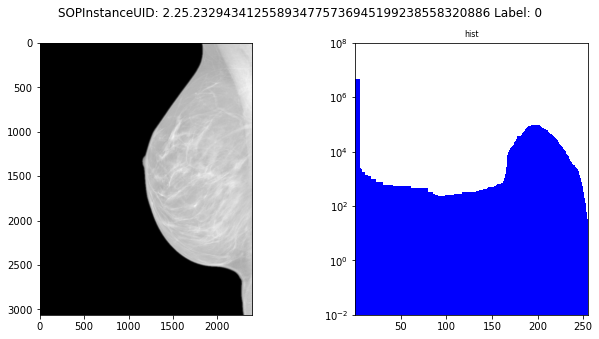

60


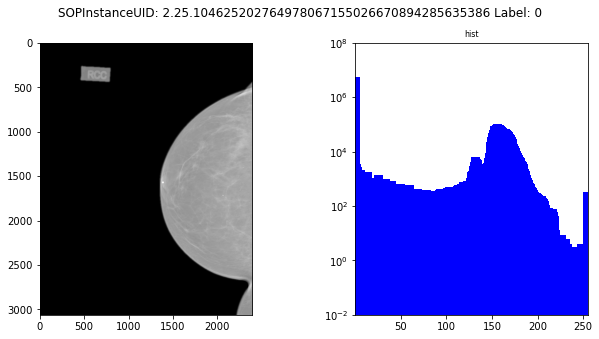

61


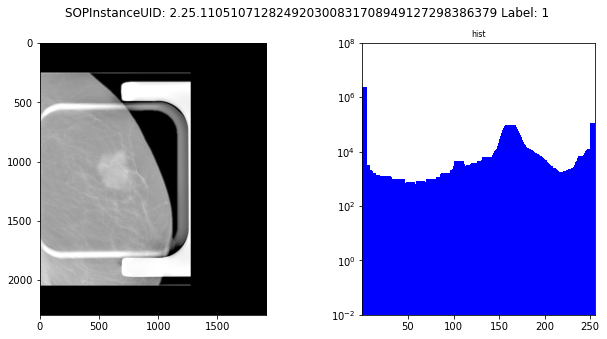

62


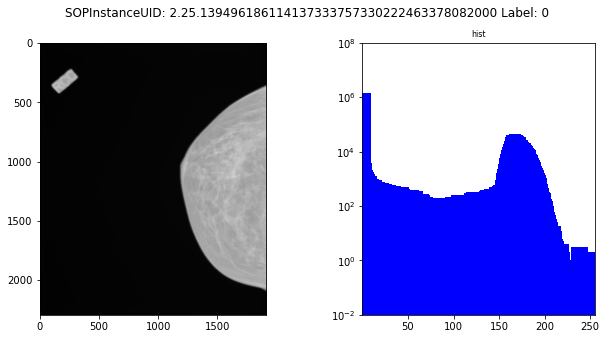

63


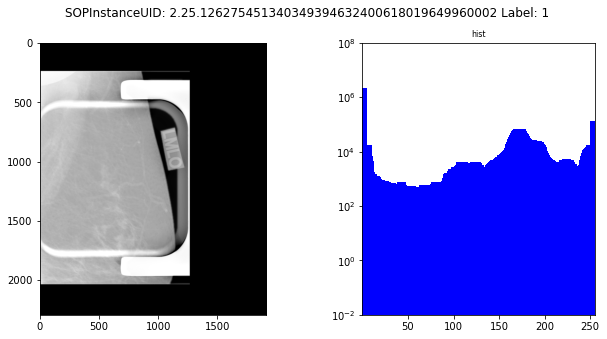

64


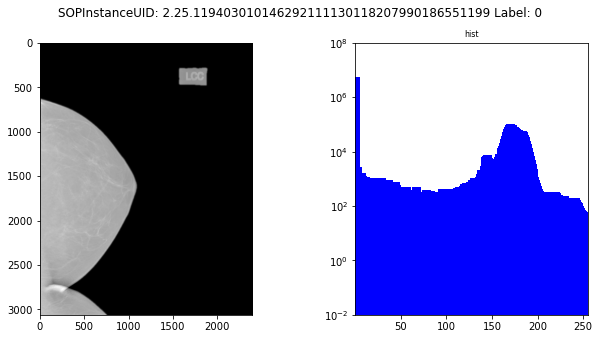

65


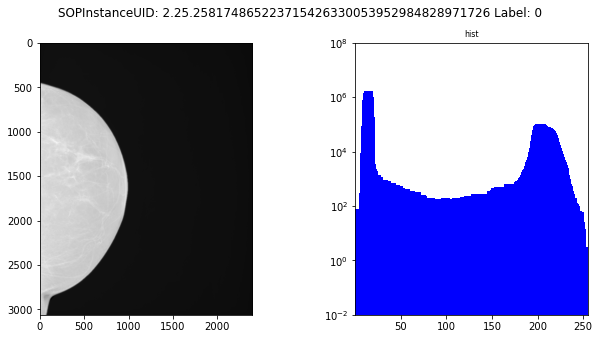

66


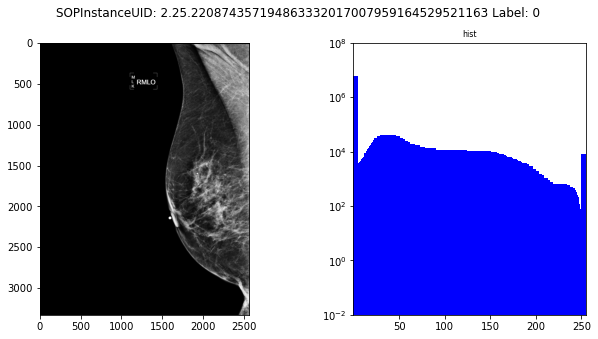

67


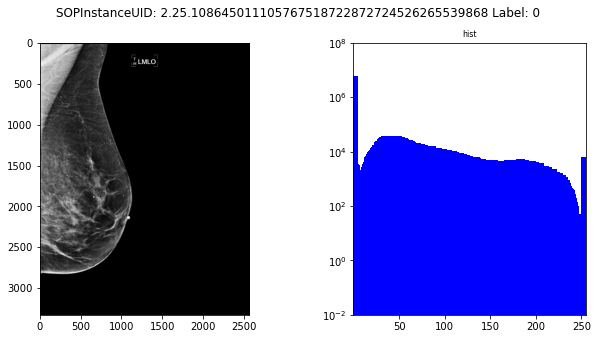

68


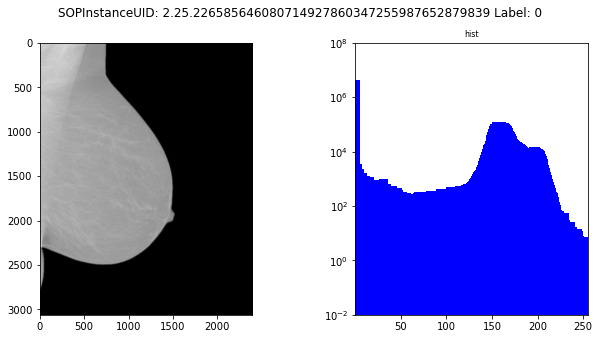

69


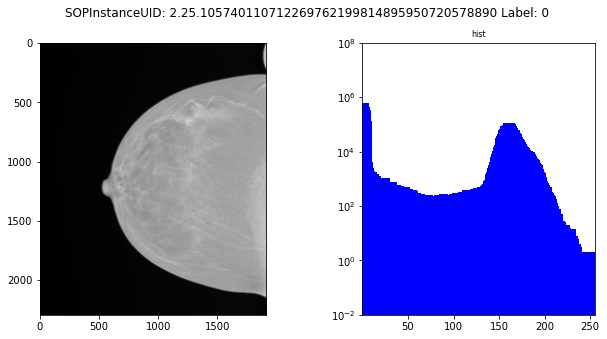

70


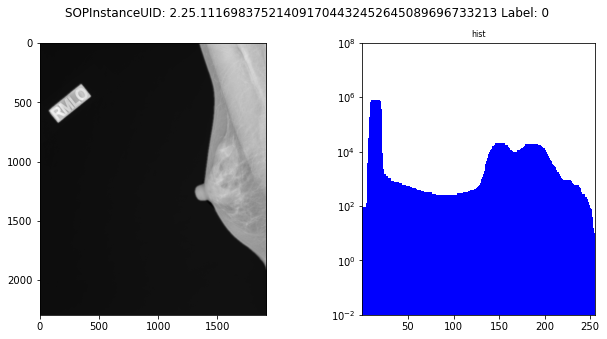

71


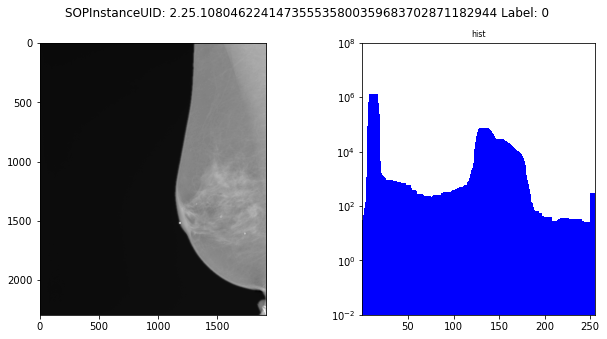

72


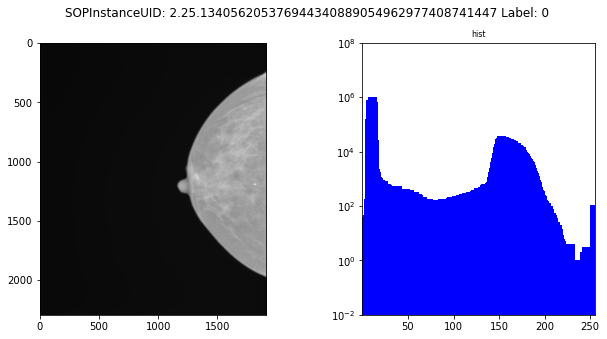

73


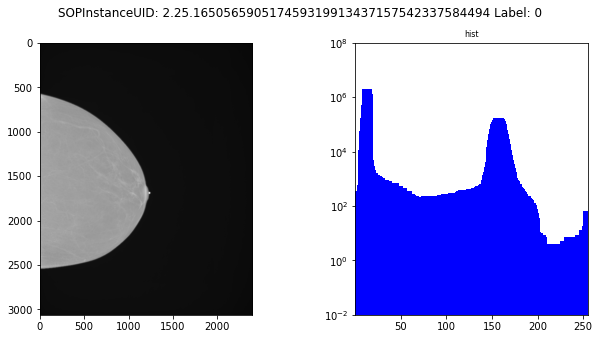

74


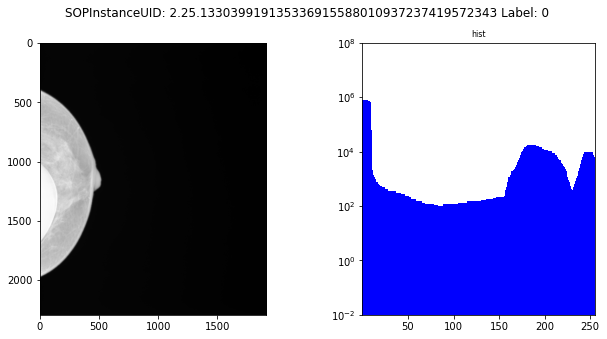

75


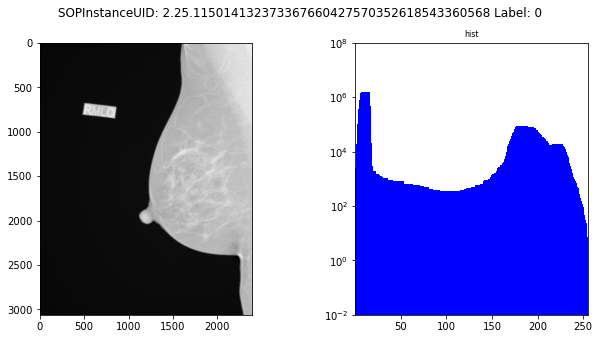

76


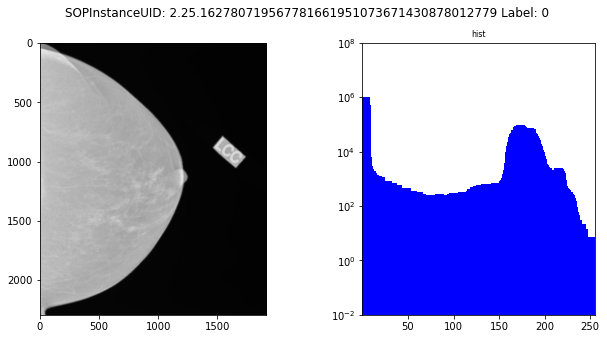

77


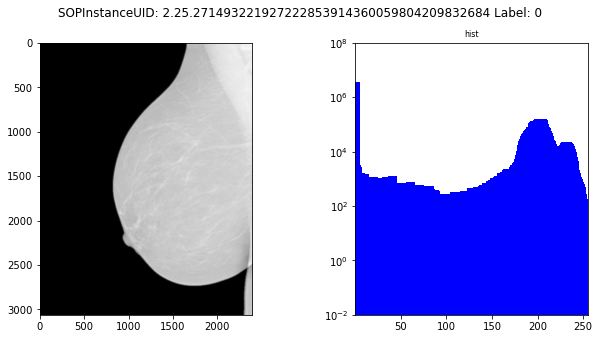

78


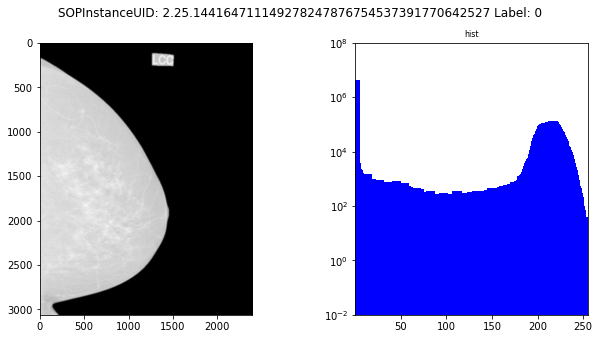

79


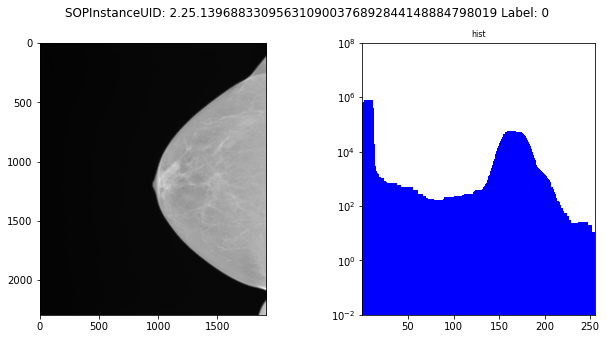

80


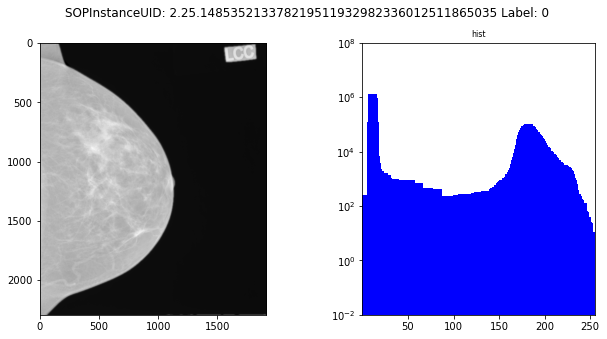

81


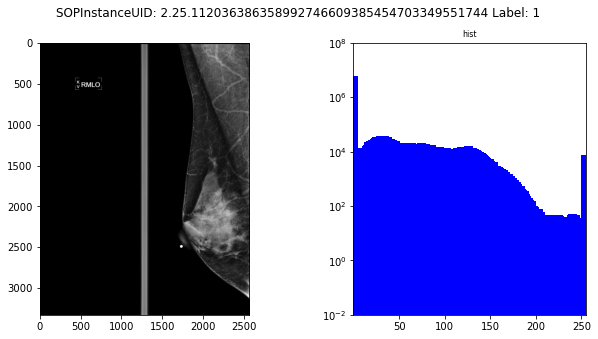

82


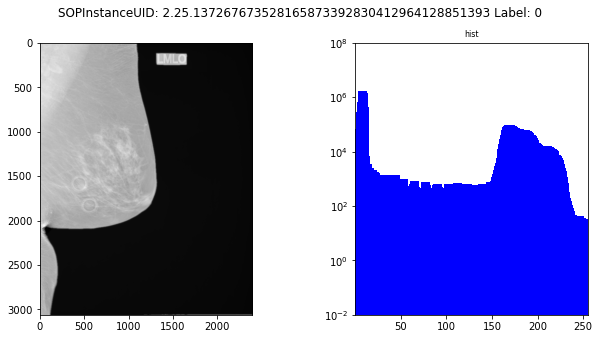

83


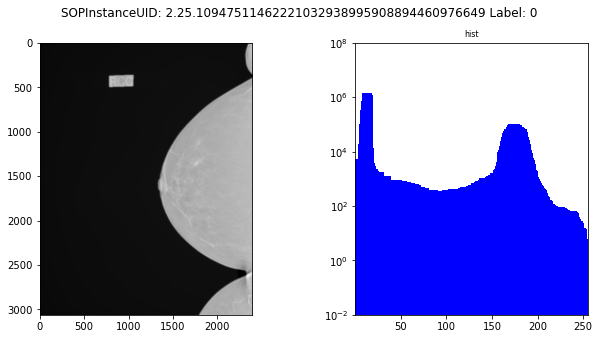

84


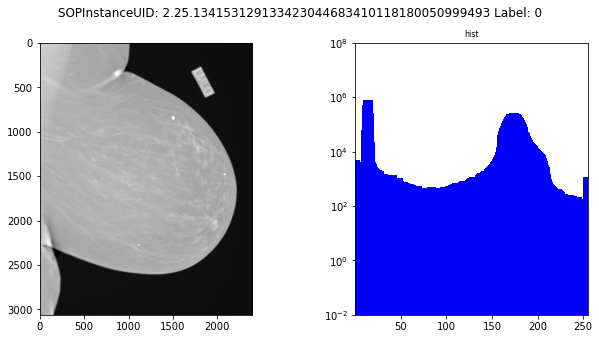

85


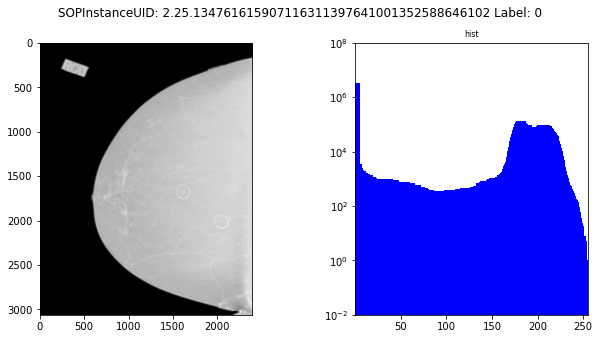

86


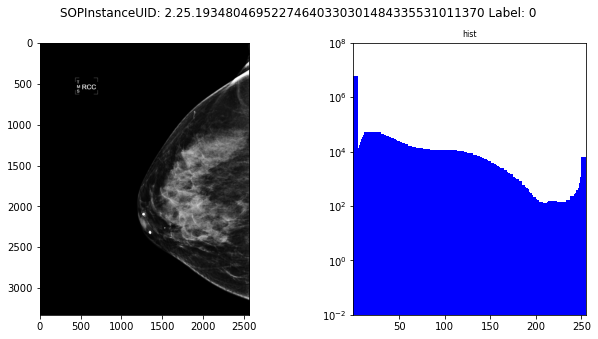

87


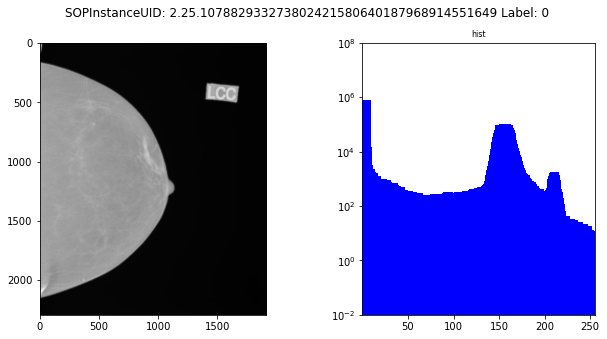

88


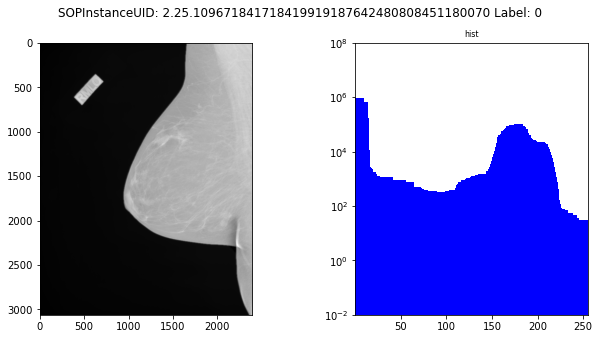

89


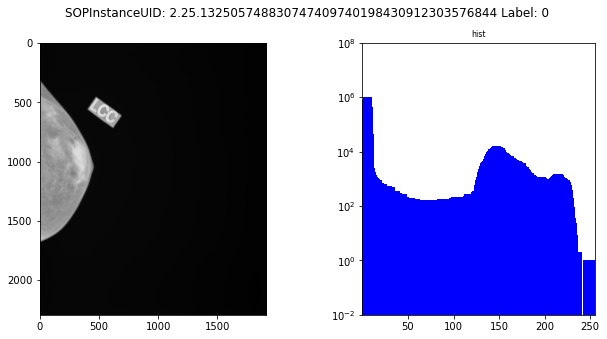

90


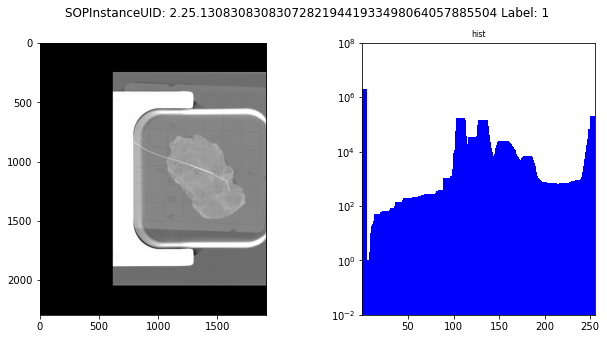

91


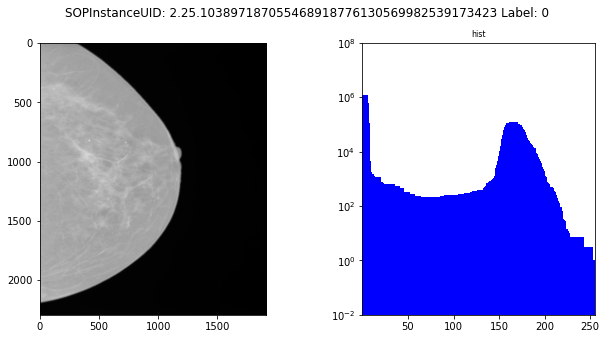

92


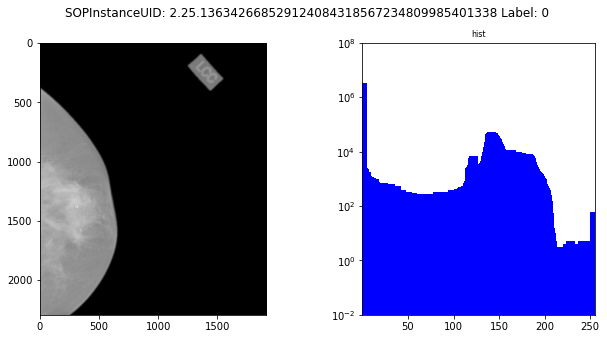

93


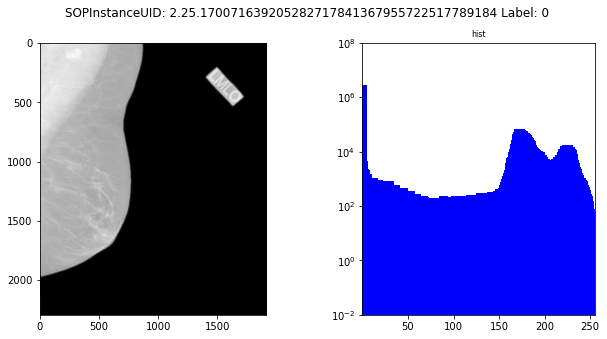

94


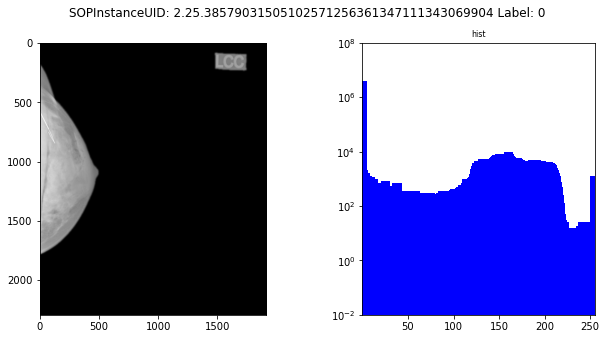

95


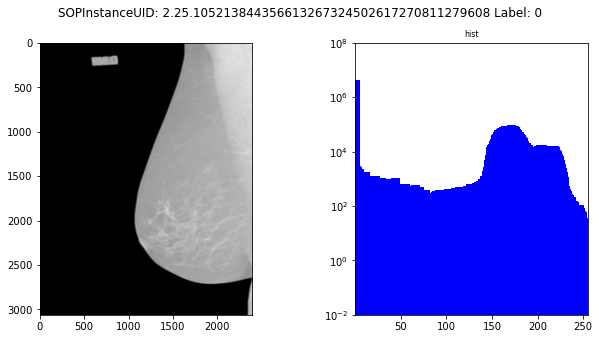

96


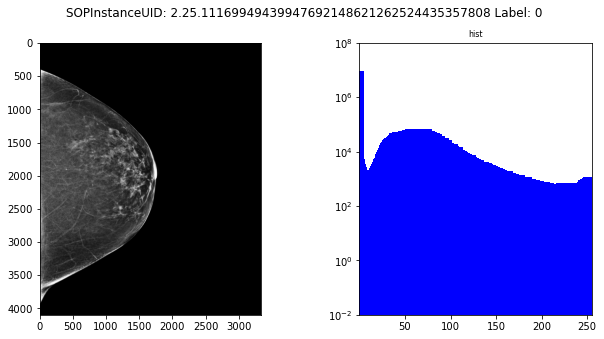

97


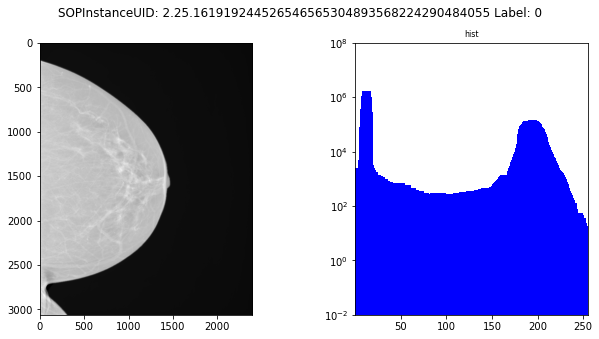

98


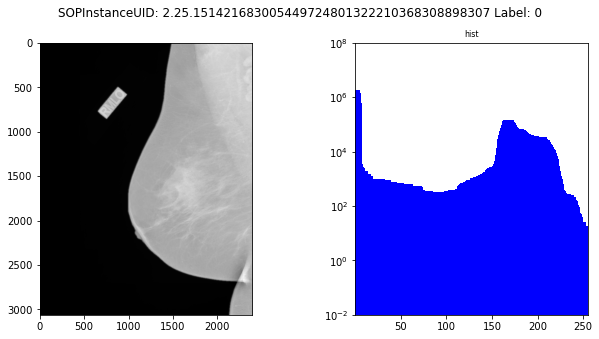

99


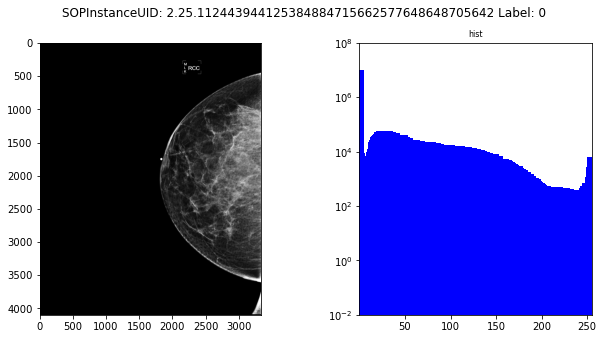

In [13]:
for i, img in enumerate(datasetA_X):
    print(i)
    O.Features.show_image_and_feature(img, ['hist'], label=str(labels[i]))

In [5]:
clf = KNN(method='mean')
clf.fit(X_feat_vect)
    
y_train_scores = clf.decision_scores_
pred_labels = clf.labels_
# y_test_scores = clf.decision_function(X_test)

In [6]:
eval = O.OutlierDetectorLite.evaluate(labels, pred_labels)

In [7]:
eval

{'groundtruth_indices': (array([27, 38, 47, 48, 61, 63, 81, 90]),),
 'pred_indices': (array([20, 38, 48, 61, 63, 66, 67, 81, 86, 90]),),
 'roc_auc': 0.8532608695652174,
 'f1_score': 0.6666666666666665,
 'acc_score': 0.94,
 'jaccard_score': 0.5,
 'precision_score': 0.6,
 'average_precision': 0.47,
 'recall_score': 0.75,
 'hamming_loss': 0.06,
 'log_loss': 2.07235856759185,
 'tn': 88,
 'fp': 4,
 'fn': 2,
 'tp': 6}